<a href="https://colab.research.google.com/github/Samuel-Schlemper-Schlemuel/Algebra_with_python/blob/main/jun%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import math
from sympy.solvers import solve
import matplotlib.pyplot as plt
import numpy as np
import random as nd
from sympy import *

In [20]:
def basic_math(n1, n2, calculation):

  match calculation:
    case 'add':
      return n1 + n2

    case 'subtract':
      return n1 - n2

    case 'multiply':
      return n1 * n2

    case 'divide':
      return n1 / n2

    case _:
      return 'Not valid calculation'

def is_prime(num):
  for maybe_factor in range(2, num):
    if num % maybe_factor == 0:
      return False

  return True

def prime_factors(num):
  result = []

  for maybe_factor in range(2, num + 1):
    if num % maybe_factor == 0 and is_prime(maybe_factor):
      result.append(maybe_factor)

  return result

def sim_square(num):
  upper_limit = math.floor(math.sqrt(num)) + 1
  max_factor = 1
  other_factor = 1
  square_root = 1

  for maybe_factor in range(2, upper_limit):
      if num % (maybe_factor**2) == 0:
          max_factor = maybe_factor**2

  other_factor = num / max_factor

  square_root = int(math.sqrt(max_factor))
  other_factor = int(other_factor)

  return square_root*sqrt(other_factor)

def solve_var(equation):
  x = symbols('x')
  return solve(equation, x)

def circumference(diameter):
  return round(diameter * math.pi, 2)

In [22]:
def menu():
  choice = input("""
  Escolha um número, sendo:
  1 -> Calculo de soma, subtração, divisão e multiplicação
  2 -> Ver se um número é primo
  3 -> Ver todos os fatores primos de um número
  4 -> Simplificar um número que está em uma raiz quadrada
  5 -> Resolver uma equação igual a zero
  6 -> Calcular a circuferencia de um circulo\n
  """)

  match choice:
    case '1':
      choice2 = input("""
      1 -> Soma
      2 -> Subtração
      3 -> Multiplicação
      4 -> Divisão\n
      """)

      match choice2:
        case '1':
          num1 = float(input("Primeiro número: "))
          num2 = float(input("Segundo número: "))
          print(basic_math(num1, num2, 'add'))

        case '2':
          num1 = float(input("Primeiro número: "))
          num2 = float(input("Segundo número: "))
          print(basic_math(num1, num2, 'subtract'))

        case '3':
          num1 = float(input("Primeiro número: "))
          num2 = float(input("Segundo número: "))
          print(basic_math(num1, num2, 'multiply'))

        case '4':
          num1 = float(input("Primeiro número: "))
          num2 = float(input("Segundo número: "))
          print(basic_math(num1, num2, 'divide'))

    case '2':
      num = int(input("Possível primo: "))
      print(is_prime(num))

    case '3':
      num = int(input("Número com fatores primos: "))
      print(prime_factors(num))

    case '4':
      num = int(input("Número dentro da raiz quadrada: "))
      return sim_square(num)

    case '5':
      eq = input('Equação com uma unica letra (X) que seja igual a zero: ')
      return solve_var(eq)

    case '6':
      num = float(input("O diametro da circuferencia: "))
      print(circumference(num))

    case _:
      print('Essa não é uma opção valida')

menu()


  Escolha um número, sendo:
  1 -> Calculo de soma, subtração, divisão e multiplicação
  2 -> Ver se um número é primo
  3 -> Ver todos os fatores primos de um número
  4 -> Simplificar um número que está em uma raiz quadrada
  5 -> Resolver uma equação igual a zero
  6 -> Calcular a circuferencia de um circulo

  5
Equação com uma unica letra (X) que seja igual a zero: 2/x - 100


[1/50]

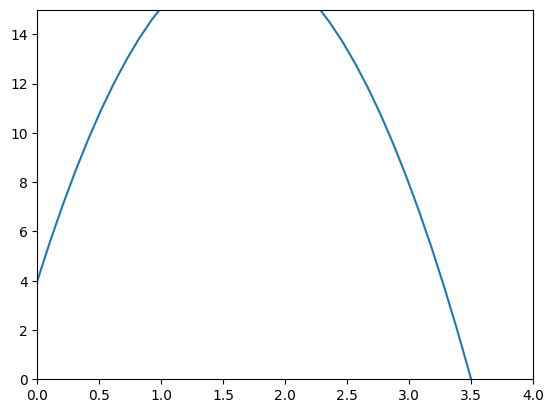

In [23]:
xmin = 0
xmax = 4
ymin = 0
ymax = 15
var('x')

a = -4.9
c = nd.randint(ymin, ymax)
equation = -(x**2 - 4*a*c) / (4*a) - 15
b = round(solve(equation, x)[1]) + 1

points = 10*(xmax-xmin)
x = np.linspace(xmin,xmax,points)
y = a*x**2 + b*x + c

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax])

plt.plot(x,y)
print(" ")
plt.show()

In [24]:
def f(string, zoom=50):
    xmin = -zoom
    xmax = zoom
    ymin = -zoom
    ymax = zoom

    points = 10*(xmax-xmin)
    x = np.linspace(xmin,xmax,points)

    try:
      fig, ax = plt.subplots()
      plt.axis([xmin,xmax,ymin,ymax])
      plt.plot([xmin,xmax],[0,0],'b')
      plt.plot([0,0],[ymin,ymax], 'b')

      exec(f'global y; y = {string}')
      plt.plot(x, y, 'r')

      ax.grid(True)
      return plt.show()
    except:
      return 'Error'

def two_equation(eq1, eq2):
    var('x y')

    exec(f'global first; first = {eq1}')
    exec(f'global second; second = {eq2}')

    return nonlinsolve([first, second], (x, y))

def equations(eq1, eq2, zoom=50):
    xmin = -zoom
    xmax = zoom
    ymin = -zoom
    ymax = zoom

    points = 10*(xmax-xmin)
    x = np.linspace(xmin,xmax,points)

    fig, ax = plt.subplots()
    plt.axis([xmin,xmax,ymin,ymax])
    plt.plot([xmin,xmax],[0,0],'b')
    plt.plot([0,0],[ymin,ymax], 'b')

    exec(f'global y1; y1 = {eq1}')
    exec(f'global y2; y2 = {eq2}')

    plt.plot(x, y1, 'r')
    plt.plot(x, y2, 'y')

    x = var('x')
    temp_x = solve(Eq(sympify(eq1), sympify(eq2)), x)
    equal_x = list()
    equal_y = list()

    for result in temp_x:
      try:
        equal_x.append(float(result))
        equal_y.append(sympify(eq1).subs('x', result))
      except:
        pass

    try:
      plt.plot(equal_x, equal_y, 'go')
    except:
      pass

    ax.grid(True)
    return plt.show()

def quadratic(a, b, c):
  delta = b**2 - 4*a*c

  try:
    solution1 = (-b + math.sqrt(delta)) / 2*a
    solution2 = (-b - math.sqrt(delta)) / 2*a
    solutions = [solution1, solution2]
  except:
    solutions = ["The delta is negative (don't have solution)"]

  x = -b/(2*a)
  y = -delta/(4*a)

  return {'roots': solutions, 'vertex': [x, y]}

In [26]:
from ipywidgets import interactive

interactive_plot = False

def menu():
  global interactive_plot

  escolha = input("""Escolha entre as opções:
  1 --> Função quadratica (criar gráfico)
  2 --> Duas equações, cada um com um x e y
  3 --> Plotar o grafico de duas funções e suas intersecções
  4 --> Plotar as soluções e os vertex de uma equação quadratica
  """)

  match escolha:
    case '1':
      eq = input('Escreva a equação: ')
      interactive_plot = interactive(f, string=eq, zoom=(1, 100))

    case '2':
      eq1 = input('Escreva a primeira equação: ')
      eq2 = input('Escreva a segunda equação: ')
      interactive_plot = two_equation(eq1, eq2)

    case '3':
      eq1 = input('Escreva a primeira equação: ')
      eq2 = input('Escreva a esegunda quação: ')
      interactive_plot = interactive(equations, eq1=eq1, eq2=eq2, zoom=(1, 100))

    case '4':
      a = float(input('a = '))
      b = float(input('b = '))
      c = float(input('c = '))
      interactive_plot = quadratic(a, b, c)

    case _:
      interactive_plot = 'Não há essa opção'

menu()
interactive_plot

Escolha entre as opções:
  1 --> Função quadratica (criar gráfico)
  2 --> Duas equações, cada um com um x e y
  3 --> Plotar o grafico de duas funções e suas intersecções
  4 --> Plotar as soluções e os vertex de uma equação quadratica
  3
Escreva a primeira equação: x**2 + 6*x - 26
Escreva a esegunda quação: x*5 + 7


interactive(children=(Text(value='x**2 + 6*x - 26', description='eq1'), Text(value='x*5 + 7', description='eq2…